### GROUP 19 - AI-Detection Content Modeling Phase (Custom Model)
NOTE: The custom model is better for essay types of contents even if I added Reddit data along the mix and it took almost 30-60 mins to train the model, so I recommend using the Hugging Face models for more accurate outputs -- Dee

Source Code: https://www.kaggle.com/code/syedali110/ai-generated-vs-human-text-95-accuracy/notebook

Source AI-Human Dataset: https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text

Source Reddit Dataset: https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import gdown
from sklearn.utils import resample

In [2]:
# Google Drive file ID
# file_id = "1VD5PVTZDCo6QO7y11Gfel2gKMqo14MDN"

# Destination file path (change if needed)
# output_file = "AI_Human.csv"

# Download the file
# gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

# print("Download completed!")

In [3]:
# Read the CSV file
df = pd.read_csv("AI_Human_Balanced.csv")

# Display first few rows
df.head()

,text,true_label
0,do curfews keep teenagers from getting into tr...,0.0
1,in this article the challenge of exploring ven...,0.0
2,with thp rapid growth of thp internet in recen...,0.0
3,the electoral college is the way us united sta...,0.0
4,this technology of you can calculate the emoti...,0.0


## **1. Data Information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362876 entries, 0 to 362875
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   text        362871 non-null  object 
 1   true_label  362876 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.5+ MB


In [5]:
df.describe()

,true_label
count,362876.000000
mean,0.500000
std,0.500001
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


<Axes: xlabel='true_label', ylabel='count'>

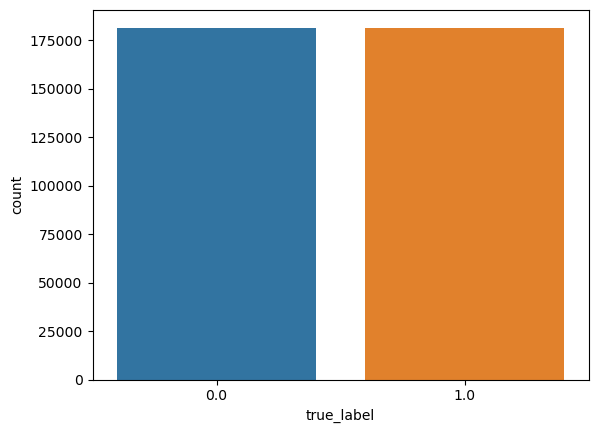

In [6]:
sns.countplot(data=df,x='true_label')

In [7]:
print('Total Texts:', df['true_label'].count())
print('Human Written Texts:', (df['true_label'] == 0.0).sum())
print('AI Generated Texts:', (df['true_label'] == 1.0).sum())


Total Texts: 362876
Human Written Texts: 181438
AI Generated Texts: 181438


## **2. Data Preprocessing**

In [8]:
df['text'][1]

'in this article the challenge of exploring venus the author suggest that studying venus is a worthy pursuit despite the dangers it presents according to the passage i will explain the reasoning and give explanations as to why he made this statement venus is simple to see from the distant some know it as the evening star but safe vantage point of earth it has proven very challenging place to examine more closely often referred to as earths twin venus is the closest planet to earth in terms of density and size and occasionally the closest in distance too one of the biggest differences is that a thick atmosphere of almost percent carbon dioxide blankets venus with highly corrosive sulfuric acid clouds in venuss atmosphere this has made it seriously challenging to do farther studies on venus humans have sent numerous spacecraft to land on this cloud draped world according to the text each mission was unmanned and for good reason since no spacecraft survived the landing for more than a few

In [9]:
def remove_tags(text):
    if not isinstance(text, str):  # text should be a string
        text = str(text)
    
    tags = ['\n', '\'']
    for tag in tags:
        text = text.replace(tag, '')
    
    return text

# Apply the function safely
df['text'] = df['text'].apply(remove_tags)

In [10]:
df['text'][1]

'in this article the challenge of exploring venus the author suggest that studying venus is a worthy pursuit despite the dangers it presents according to the passage i will explain the reasoning and give explanations as to why he made this statement venus is simple to see from the distant some know it as the evening star but safe vantage point of earth it has proven very challenging place to examine more closely often referred to as earths twin venus is the closest planet to earth in terms of density and size and occasionally the closest in distance too one of the biggest differences is that a thick atmosphere of almost percent carbon dioxide blankets venus with highly corrosive sulfuric acid clouds in venuss atmosphere this has made it seriously challenging to do farther studies on venus humans have sent numerous spacecraft to land on this cloud draped world according to the text each mission was unmanned and for good reason since no spacecraft survived the landing for more than a few

In [11]:
import string

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punc(text):
    new_text = [x for x in text if x not in string.punctuation]
    new_text = ''.join(new_text)
    return new_text

df['text']=df['text'].apply(remove_punc)

In [14]:
 df['text'][1]

'in this article the challenge of exploring venus the author suggest that studying venus is a worthy pursuit despite the dangers it presents according to the passage i will explain the reasoning and give explanations as to why he made this statement venus is simple to see from the distant some know it as the evening star but safe vantage point of earth it has proven very challenging place to examine more closely often referred to as earths twin venus is the closest planet to earth in terms of density and size and occasionally the closest in distance too one of the biggest differences is that a thick atmosphere of almost percent carbon dioxide blankets venus with highly corrosive sulfuric acid clouds in venuss atmosphere this has made it seriously challenging to do farther studies on venus humans have sent numerous spacecraft to land on this cloud draped world according to the text each mission was unmanned and for good reason since no spacecraft survived the landing for more than a few

## **3. Spell Check - Process**

In [15]:
import nltk
from nltk.corpus import words

nltk.download('words')
english_words = set(words.words())

def is_spelled_correctly(word):
    return word in english_words

[nltk_data] Downloading package words to C:\Users\Daniella Kim N.
[nltk_data]     Nilo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [16]:
word_to_check = df['text'][9]
if is_spelled_correctly(word_to_check):
    print(f"The word '{word_to_check}' is spelled correctly.")
else:
    print(f"The word '{word_to_check}' is spelled incorrectly.")

The word 'in the article the challenge of exploring venus the author suggest that venus is worthy of being studied despite the dangers that it presents us humans have landed on the moon and sent and landed covers on mass why not try and land a jove on venus the author does a good job of supporting hishe claim that we should go to and study venus more by talking about how it may well once been the most deathlike planet in out solar system sending blimplike vehicles to hover above the surface and testing that nasa has done venus may well once been the most deathlike planet in out solar system in the article the author states the planet has a surface of rocky sediment and includes features such as valleys mountains and craters the author says in paragraph is long ago venus was probably covered largely with oceans and could have supported various forms of life just like earth the authors means that since venus has all of these terrains that are similar to earth that it may have had liquid 

In [17]:
df['text'][9]

'in the article the challenge of exploring venus the author suggest that venus is worthy of being studied despite the dangers that it presents us humans have landed on the moon and sent and landed covers on mass why not try and land a jove on venus the author does a good job of supporting hishe claim that we should go to and study venus more by talking about how it may well once been the most deathlike planet in out solar system sending blimplike vehicles to hover above the surface and testing that nasa has done venus may well once been the most deathlike planet in out solar system in the article the author states the planet has a surface of rocky sediment and includes features such as valleys mountains and craters the author says in paragraph is long ago venus was probably covered largely with oceans and could have supported various forms of life just like earth the authors means that since venus has all of these terrains that are similar to earth that it may have had liquid water on 

In [18]:
#import nltk
#from nltk.tok enize import word_tokenize, sent_tokenize
#from nltk.stem import PorterStemmer

#def correct_text(text):
 #   stemmer = PorterStemmer()
  #  english_words = set(words.words())
   # list_text = word_tokenize(text.lower())
    #stemmed_words = [stemmer.stem(word) for word in list_text]
    #for word in stemmed_words:
     #   if word not in english_words:
      #    return word

#correct_text(df['text'][0])
    

## **4. Removal of Stop Words**

In [19]:
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words= ' '.join(filtered_words)
    return filtered_words

df['text']=df['text'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to C:\Users\Daniella Kim N.
[nltk_data]     Nilo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df['text'][1]

'article challenge exploring venus author suggest studying venus worthy pursuit despite dangers presents according passage explain reasoning give explanations made statement venus simple see distant know evening star safe vantage point earth proven challenging place examine closely often referred earths twin venus closest planet earth terms density size occasionally closest distance one biggest differences thick atmosphere almost percent carbon dioxide blankets venus highly corrosive sulfuric acid clouds venuss atmosphere made seriously challenging farther studies venus humans sent numerous spacecraft land cloud draped world according text mission unmanned good reason since spacecraft survived landing hours maybe issue explains single spaceship touched venus three decades venus found dangerous challenging farther studies yet scientists still discussing farther visits surface fascination venus may well earthlike planet solar system according text long ago venus probably covered largely 

## **5. Reddit Data Mix**

In [21]:
# Load the Reddit dataset
reddit_data = pd.read_csv("Reddit_Cleaned_Classified.csv") 

# Display the first few rows
print(reddit_data.head())

                                                text  classification
0  family mormon have never tried explain them th...             0.0
1  buddhism has very much lot compatible with chr...             0.0
2  seriously don say thing first all they won get...             0.0
3  what you have learned yours and only yours wha...             0.0
4  for your own benefit you may want read living ...             0.0


In [22]:
# Rename 'classification' column to 'true_label'
reddit_data = reddit_data.rename(columns={"classification": "true_label"})

# Display the first few rows to verify changes
print(reddit_data.head())

                                                text  true_label
0  family mormon have never tried explain them th...         0.0
1  buddhism has very much lot compatible with chr...         0.0
2  seriously don say thing first all they won get...         0.0
3  what you have learned yours and only yours wha...         0.0
4  for your own benefit you may want read living ...         0.0


In [23]:
# Check for missing values in the 'text' column
print(reddit_data['text'].isnull().sum())

249


In [24]:
# Drop rows with missing values in the 'text' column
reddit_data = reddit_data.dropna(subset=['text'])

In [25]:
# Check for missing values again
print(reddit_data['text'].isnull().sum())

0


In [26]:
# Merge both datasets
df = pd.concat([df, reddit_data], ignore_index=True)

In [27]:
# Verify new dataset structure
print("Dataset structure after merging:")
print(df.info())

Dataset structure after merging:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399776 entries, 0 to 399775
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   text        399776 non-null  object 
 1   true_label  399776 non-null  float64
dtypes: float64(1), object(1)
memory usage: 6.1+ MB
None


In [28]:
# Check class distribution
print("Class distribution after merging:")
print(df['true_label'].value_counts())

Class distribution after merging:
true_label
0.0    218338
1.0    181438
Name: count, dtype: int64


In [29]:
# Separate AI and human texts
human_texts = df[df['true_label'] == 0]
ai_texts = df[df['true_label'] == 1]

# Downsample human texts to match AI texts
human_texts_balanced = resample(human_texts, replace=False, n_samples=len(ai_texts), random_state=42)

# Combine balanced dataset
df = pd.concat([human_texts_balanced, ai_texts])

In [30]:
# Verify final balance
print("Final balanced dataset shape:", df.shape)
print("Final class distribution:")
print(df['true_label'].value_counts())

Final balanced dataset shape: (362876, 2)
Final class distribution:
true_label
0.0    181438
1.0    181438
Name: count, dtype: int64


## **6. Dataset Splitting (Train and Test Sets)**

In [31]:
y=df['true_label']
X=df['text']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 254013
Testing set size: 108863


## **7. Model Training**

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [35]:
from sklearn.preprocessing import StandardScaler
# Update the pipeline with StandardScaler
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),  # CountVectorizer
    ('tfidf_transformer', TfidfTransformer()),  # TF-IDF Transformer
    ('naive_bayes', MultinomialNB())])

In [36]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()),
                ('naive_bayes', MultinomialNB())])

In [37]:
y_pred= pipeline.predict(X_test)

## **8. Performance Metrics Analysis**

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     54290
         1.0       0.96      0.95      0.96     54573

    accuracy                           0.96    108863
   macro avg       0.96      0.96      0.96    108863
weighted avg       0.96      0.96      0.96    108863



In [39]:
%whos

Variable                Type                    Data/Info
---------------------------------------------------------
CountVectorizer         type                    <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
MultinomialNB           ABCMeta                 <class 'sklearn.naive_bayes.MultinomialNB'>
Pipeline                ABCMeta                 <class 'sklearn.pipeline.Pipeline'>
SVC                     ABCMeta                 <class 'sklearn.svm._classes.SVC'>
StandardScaler          type                    <class 'sklearn.preproces<...>ng._data.StandardScaler'>
TfidfTransformer        type                    <class 'sklearn.feature_e<...>n.text.TfidfTransformer'>
X                       Series                  101378    dear mrmrs flor<...>th: 362876, dtype: object
X_test                  Series                  383552    went india like<...>th: 108863, dtype: object
X_train                 Series                  303616    dear senator wr<...>th: 254013, dtype: object
a

In [40]:
import joblib

# Save the trained pipeline model
joblib.dump(pipeline, 'ai_detection_pipeline3-final.pkl')

print("Model saved successfully!")

Model saved successfully!


## **9. Reddit Testing Phase**

In [41]:
# Example Reddit post (you can replace this with an actual Reddit post)
reddit_post = """
That's true. But especially for romance, a lot of it comes down to audience overlap. As a straight man, I'm going to skip over a lot of romance books with an "ab heavy" cover since I know it's not what I'm looking for. Not a value judgment, just I know it's catering to other tastes.

There is a subreddit for r/Romance_for_Men specifically for romance for (usually straight) male readers, and I'm sure there are specific romance subgenres for different LGBT+ groups
"""

# Preprocess the Reddit post (same steps as the training data)
reddit_post = remove_tags(reddit_post)
reddit_post = remove_punc(reddit_post)
reddit_post = remove_stopwords(reddit_post)

# Predict using the trained model
prediction = pipeline.predict([reddit_post])

# Output the prediction
if prediction[0] == 0.0:
    print("The Reddit post is predicted to be human-written.")
else:
    print("The Reddit post is predicted to be AI-generated.")

The Reddit post is predicted to be human-written.


In [42]:
# Predict probabilities instead of class labels
probabilities = pipeline.predict_proba([reddit_post])

# Extract the probability of the text being AI-generated (class 1.0)
ai_probability = probabilities[0][1]  # P(AI)
human_probability = probabilities[0][0]  # P(human)

# Output the results
print(f"Probability of being AI-generated: {ai_probability * 100:.2f}%")
print(f"Probability of being human-written: {human_probability * 100:.2f}%")

Probability of being AI-generated: 32.10%
Probability of being human-written: 67.90%
